In [ ]:
import pynattas as pnas

In [ ]:
code = pnas.functions.architecture_builder.generate_random_architecture_code(4)
print(code)
parsed_architecture = pnas.functions.architecture_builder.parse_architecture_code(code)
print(parsed_architecture)
print(pnas.functions.architecture_builder.generate_code_from_parsed_architecture(parsed_architecture))

In [ ]:
layer_code = pnas.functions.architecture_builder.generate_layer_code()
print(layer_code)
parsed_layer = pnas.functions.architecture_builder.parse_architecture_code(layer_code)
print(parsed_layer)
print(pnas.functions.architecture_builder.generate_pooling_layer_code())
print(pnas.functions.architecture_builder.generate_head_code())

In [ ]:
ind = pnas.classes.individual.Individual(4)
print(ind.architecture)
print(ind.chromosome)
print(ind.fitness)
ind.architecture=ind.chromosome2architecture(ind.chromosome)
print(ind.architecture)
ind_copy = ind.copy()
print(ind_copy.architecture)
print(ind_copy.chromosome)

In [ ]:
parsed_layers_test = [{'layer_type': 'MBConv', 'expansion_factor': 4, 'activation': 'ReLU', 'num_blocks': 1}, {'layer_type': 'AvgPool'}, {'layer_type': 'ConvAct', 'out_channels_coefficient': 2, 'kernel_size': 4, 'stride': 1, 'padding': 0, 'activation': 'ReLU', 'num_blocks': 1}, {'layer_type': 'AvgPool'}, {'layer_type': 'ConvBnAct', 'out_channels_coefficient': 3, 'kernel_size': 5, 'stride': 2, 'padding': 2, 'activation': 'GELU', 'num_blocks': 1}, {'layer_type': 'MaxPool'}, {'layer_type': 'ClassificationHead'}]
architecture_code_test = pnas.functions.architecture_builder.generate_code_from_parsed_architecture(parsed_layers_test)
print(architecture_code_test)

# Main Test

In [ ]:
%run main.py

# Testing fitness

In [ ]:
parsed_layers = pnas.functions.architecture_builder.parse_architecture_code(ind.architecture)
fitness = pnas.functions.fitness.compute_fitness_value(parsed_layers=parsed_layers)
print(fitness)

# Genetic Algorithm Test

In [ ]:
import configparser

In [ ]:
config = configparser.ConfigParser()
config.read('config.ini')

In [ ]:
max_layers = config.getint('NAS', 'max_layers')
#max_iterations = int(config['GA']['max_iterations'])
max_iterations = 3
#population_size = int(config['GA']['population_size'])
population_size = 4
log_path = str(config['GA']['logs_dir_GA'])
mating_pool_cutoff = float(config['GA']['mating_pool_cutoff'])
mutation_probability = float(config['GA']['mutation_probability'])
nas_result = pnas.optimizers.ga.ga_optimizer(
    max_layers=max_layers,
    max_iter=max_iterations,
    n_individuals=population_size,
    mating_pool_cutoff=mating_pool_cutoff,
    mutation_probability=mutation_probability,
    logs_directory=log_path,
)

# HT TEST

In [ ]:
import configparser
import pynattas as pnas

In [ ]:
config = configparser.ConfigParser()
config.read('config.ini')

# Use NAS result if available, otherwise load from config
architecture_code = config['NAS']['architecture_code']
layers = pnas.functions.architecture_builder.parse_architecture_code(architecture_code)
print('HT Layers:', layers)
best_position = []  # initialize final best position for final run

print("\n*** Hyperparameter Tuning ***\n")

In [ ]:
# Define HT search space
search_space = pnas.functions.utils.generate_layers_search_space(layers)
search_space['log_learning_rate'] = (
    float(config['Search Space']['log_lr_min']),
    float(config['Search Space']['log_lr_max']),
)
search_space['batch_size'] = (
    float(config['Search Space']['bs_min']),
    float(config['Search Space']['bs_max']),
)

print('Search space:', search_space)

Seed set to 7



*** Network Architecture Search ***

Starting chromosome pool:
Architecture: Lme6arn1EPMELdo3arn1EPMELRr2agn1EPaELdo3agn1EPMEHCEE
Chromosome: ['Lme6arn1', 'PM', 'Ldo3arn1', 'PM', 'LRr2agn1', 'Pa', 'Ldo3agn1', 'PM', 'HC']


***

[{'layer_type': 'MBConv', 'expansion_factor': 6, 'activation': 'ReLU', 'num_blocks': 1}, {'layer_type': 'MaxPool'}, {'layer_type': 'DenseNetBlock', 'out_channels_coefficient': 3, 'activation': 'ReLU', 'num_blocks': 1}, {'layer_type': 'MaxPool'}, {'layer_type': 'ResNetBlock', 'reduction_factor': 2, 'activation': 'GELU', 'num_blocks': 1}, {'layer_type': 'AvgPool'}, {'layer_type': 'DenseNetBlock', 'out_channels_coefficient': 3, 'activation': 'GELU', 'num_blocks': 1}, {'layer_type': 'MaxPool'}, {'layer_type': 'ClassificationHead'}]
***




GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type                   | Params
------------------------------------------------------------
0 | model            | GenericNetwork         | 6.3 M 
1 | loss_fn          | CrossEntropyLoss       | 0     
2 | accuracy         | BinaryAccuracy         | 0     
3 | f1_score         | BinaryF1Score          | 0     
4 | mcc              | BinaryMatthewsCorrCoef | 0     
5 | conf_matrix      | BinaryConfusionMatrix  | 0     
6 | conf_matrix_pred | BinaryConfusionMatrix  | 0     
------------------------------------------------------------
6.3 M     Trainable params
0         Non-trainable params
6.3 M     Total params
25.191    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.


c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.


Epoch 8: 100%|██████████| 1126/1126 [00:29<00:00, 38.81it/s, v_num=10, train_loss=0.151, train_accuracy=0.945, train_f1_score=0.866, train_mcc=0.904]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation DataLoader 0: 100%|██████████| 1126/1126 [00:13<00:00, 80.88it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        val_loss            0.07182962447404861
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'test_dataloader' to speed up the dataloader worker initialization.


Testing DataLoader 0: 100%|██████████| 133/133 [00:02<00:00, 62.73it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.8719397187232971
      test_f1_score        0.011048336513340473
        test_loss           0.5879626274108887
        test_mcc            0.7584461569786072
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Seed set to 7
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type                   | Params
------------------------------------------------------------
0 | model            | GenericNetwork         | 4.7 M 
1 | loss_fn          | CrossEntropyLoss       | 0     
2 | accuracy         | BinaryAccuracy         | 0     
3 | f1_score         | BinaryF1Score          | 0     
4 | mcc              | BinaryMatthewsCorrCoef | 0     
5 | conf_matrix      | BinaryConfusionMatrix  | 0     
6 | conf_matrix_pred | BinaryConfusionMatrix  | 0     
------------------------------------------------------------
4.7 M     Trainable params
0         Non-trainable params
4.7 M     Total params
18.888    Total estimated model params size (MB)


Training time: 254.99543642997742
Accuracy: 0.8719397187232971
F1 score: 0.011048336513340473
MCC: 0.7584461569786072
Fitness: 0.5471447374050816
********
chromosome: ['Lme6arn1', 'PM', 'Ldo3arn1', 'PM', 'LRr2agn1', 'Pa', 'Ldo3agn1', 'PM', 'HC'], fitness: 0.5471447374050816

Architecture: Lco3k3s2p1arn1EPMELne5arn1EPaEHCEE
Chromosome: ['Lco3k3s2p1arn1', 'PM', 'Lne5arn1', 'Pa', 'HC']


***

[{'layer_type': 'ConvBnAct', 'out_channels_coefficient': 3, 'kernel_size': 3, 'stride': 2, 'padding': 1, 'activation': 'ReLU', 'num_blocks': 1}, {'layer_type': 'MaxPool'}, {'layer_type': 'MBConvNoRes', 'expansion_factor': 5, 'activation': 'ReLU', 'num_blocks': 1}, {'layer_type': 'AvgPool'}, {'layer_type': 'ClassificationHead'}]
***


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.


c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.


Epoch 14: 100%|██████████| 1126/1126 [00:23<00:00, 47.21it/s, v_num=11, train_loss=0.055, train_accuracy=0.980, train_f1_score=0.914, train_mcc=0.966] 


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation DataLoader 0: 100%|██████████| 1126/1126 [00:11<00:00, 94.27it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        val_loss            0.03776627406477928
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'test_dataloader' to speed up the dataloader worker initialization.


Testing DataLoader 0: 100%|██████████| 133/133 [00:02<00:00, 65.21it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.8907721042633057
      test_f1_score        0.005838041193783283
        test_loss           1.1867523193359375
        test_mcc             0.791608989238739
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Seed set to 7
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type                   | Params
------------------------------------------------------------
0 | model            | GenericNetwork         | 3.2 M 
1 | loss_fn          | CrossEntropyLoss       | 0     
2 | accuracy         | BinaryAccuracy         | 0     
3 | f1_score         | BinaryF1Score          | 0     
4 | mcc              | BinaryMatthewsCorrCoef | 0     
5 | conf_matrix      | BinaryConfusionMatrix  | 0     
6 | conf_matrix_pred | BinaryConfusionMatrix  | 0     
------------------------------------------------------------
3.2 M     Trainable params
0         Non-trainable params
3.2 M     Total params
12.602    Total estimated model params size (MB)


Training time: 367.4844059944153
Accuracy: 0.8907721042633057
F1 score: 0.005838041193783283
MCC: 0.791608989238739
Fitness: 0.562739711565276
********
chromosome: ['Lco3k3s2p1arn1', 'PM', 'Lne5arn1', 'Pa', 'HC'], fitness: 0.562739711565276

Architecture: Lco2k4s2p1agn1EPMELne4arn1EPaELco4k4s1p2arn1EPaEHCEE
Chromosome: ['Lco2k4s2p1agn1', 'PM', 'Lne4arn1', 'Pa', 'Lco4k4s1p2arn1', 'Pa', 'HC']


***

[{'layer_type': 'ConvBnAct', 'out_channels_coefficient': 2, 'kernel_size': 4, 'stride': 2, 'padding': 1, 'activation': 'GELU', 'num_blocks': 1}, {'layer_type': 'MaxPool'}, {'layer_type': 'MBConvNoRes', 'expansion_factor': 4, 'activation': 'ReLU', 'num_blocks': 1}, {'layer_type': 'AvgPool'}, {'layer_type': 'ConvBnAct', 'out_channels_coefficient': 4, 'kernel_size': 4, 'stride': 1, 'padding': 2, 'activation': 'ReLU', 'num_blocks': 1}, {'layer_type': 'AvgPool'}, {'layer_type': 'ClassificationHead'}]
***


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.


c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.


Epoch 15: 100%|██████████| 1126/1126 [00:37<00:00, 30.14it/s, v_num=12, train_loss=0.0497, train_accuracy=0.983, train_f1_score=0.906, train_mcc=0.971]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation DataLoader 0: 100%|██████████| 1126/1126 [00:35<00:00, 31.46it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        val_loss           0.027603881433606148
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'test_dataloader' to speed up the dataloader worker initialization.


Testing DataLoader 0: 100%|██████████| 133/133 [00:06<00:00, 21.94it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.8662900328636169
      test_f1_score        0.005838041193783283
        test_loss           0.7482496500015259
        test_mcc            0.7490541934967041
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Seed set to 7


Training time: 605.4087564945221
Accuracy: 0.8662900328636169
F1 score: 0.005838041193783283
MCC: 0.7490541934967041
Fitness: 0.5403940891847014
********
chromosome: ['Lco2k4s2p1agn1', 'PM', 'Lne4arn1', 'Pa', 'Lco4k4s1p2arn1', 'Pa', 'HC'], fitness: 0.5403940891847014

Architecture: Ldo2agn1EPaELme4agn1EPMELRr2agn1EPaEHCEE
Chromosome: ['Ldo2agn1', 'Pa', 'Lme4agn1', 'PM', 'LRr2agn1', 'Pa', 'HC']


***

[{'layer_type': 'DenseNetBlock', 'out_channels_coefficient': 2, 'activation': 'GELU', 'num_blocks': 1}, {'layer_type': 'AvgPool'}, {'layer_type': 'MBConv', 'expansion_factor': 4, 'activation': 'GELU', 'num_blocks': 1}, {'layer_type': 'MaxPool'}, {'layer_type': 'ResNetBlock', 'reduction_factor': 2, 'activation': 'GELU', 'num_blocks': 1}, {'layer_type': 'AvgPool'}, {'layer_type': 'ClassificationHead'}]
***




GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type                   | Params
------------------------------------------------------------
0 | model            | GenericNetwork         | 4.7 M 
1 | loss_fn          | CrossEntropyLoss       | 0     
2 | accuracy         | BinaryAccuracy         | 0     
3 | f1_score         | BinaryF1Score          | 0     
4 | mcc              | BinaryMatthewsCorrCoef | 0     
5 | conf_matrix      | BinaryConfusionMatrix  | 0     
6 | conf_matrix_pred | BinaryConfusionMatrix  | 0     
------------------------------------------------------------
4.7 M     Trainable params
0         Non-trainable params
4.7 M     Total params
18.887    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.


c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.


Epoch 10: 100%|██████████| 1126/1126 [00:26<00:00, 42.65it/s, v_num=13, train_loss=0.109, train_accuracy=0.964, train_f1_score=0.906, train_mcc=0.938]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation DataLoader 0: 100%|██████████| 1126/1126 [00:12<00:00, 87.55it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        val_loss           0.015796879306435585
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'test_dataloader' to speed up the dataloader worker initialization.


Testing DataLoader 0: 100%|██████████| 133/133 [00:02<00:00, 55.18it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy          0.909604549407959
      test_f1_score        0.009792842902243137
        test_loss           0.9711249470710754
        test_mcc            0.8257986903190613
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Seed set to 7


Training time: 378.26760601997375
Accuracy: 0.909604549407959
F1 score: 0.009792842902243137
MCC: 0.8257986903190613
Fitness: 0.5817320275430878
********
chromosome: ['Ldo2agn1', 'Pa', 'Lme4agn1', 'PM', 'LRr2agn1', 'Pa', 'HC'], fitness: 0.5817320275430878

Text file saved: ./logs/GA_logs\GA_generation_0.txt
*** GENERATION 1 ***
Architecture: Ldo2agn1EPaELeo3k4s1p2arn1EPaEHCEE
Chromosome: ['Ldo2agn1', 'Pa', 'Leo3k4s1p2arn1', 'Pa', 'HC']


***

[{'layer_type': 'DenseNetBlock', 'out_channels_coefficient': 2, 'activation': 'GELU', 'num_blocks': 1}, {'layer_type': 'AvgPool'}, {'layer_type': 'ConvSE', 'out_channels_coefficient': 3, 'kernel_size': 4, 'stride': 1, 'padding': 2, 'activation': 'ReLU', 'num_blocks': 1}, {'layer_type': 'AvgPool'}, {'layer_type': 'ClassificationHead'}]
***




GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type                   | Params
------------------------------------------------------------
0 | model            | GenericNetwork         | 56.6 M
1 | loss_fn          | CrossEntropyLoss       | 0     
2 | accuracy         | BinaryAccuracy         | 0     
3 | f1_score         | BinaryF1Score          | 0     
4 | mcc              | BinaryMatthewsCorrCoef | 0     
5 | conf_matrix      | BinaryConfusionMatrix  | 0     
6 | conf_matrix_pred | BinaryConfusionMatrix  | 0     
------------------------------------------------------------
56.6 M    Trainable params
0         Non-trainable params
56.6 M    Total params
226.515   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.


c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.


Epoch 8: 100%|██████████| 1126/1126 [00:36<00:00, 31.05it/s, v_num=14, train_loss=0.491, train_accuracy=0.732, train_f1_score=0.524, train_mcc=0.517]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation DataLoader 0: 100%|██████████| 1126/1126 [00:08<00:00, 139.32it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        val_loss             0.357930451631546
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'test_dataloader' to speed up the dataloader worker initialization.


Testing DataLoader 0: 100%|██████████| 133/133 [00:01<00:00, 103.93it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9171375036239624
      test_f1_score                 0.0
        test_loss           0.4665336310863495
        test_mcc            0.8395189046859741
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Seed set to 7
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type                   | Params
------------------------------------------------------------
0 | model            | GenericNetwork         | 4.7 M 
1 | loss_fn          | CrossEntropyLoss       | 0     
2 | accuracy         | BinaryAccuracy         | 0     
3 | f1_score         | BinaryF1Score          | 0     
4 | mcc              | BinaryMatthewsCorrCoef | 0     
5 | conf_matrix      | BinaryConfusionMatrix  | 0     
6 | conf_matrix_pred | BinaryConfusionMatrix  | 0     
------------------------------------------------------------
4.7 M     Trainable params
0         Non-trainable params
4.7 M     Total params
18.900    Total estimated model params size (MB)


Training time: 359.4480559825897
Accuracy: 0.9171375036239624
F1 score: 0.0
MCC: 0.8395189046859741
Fitness: 0.5855521361033121
********
chromosome: ['Ldo2agn1', 'Pa', 'Leo3k4s1p2arn1', 'Pa', 'HC'], fitness: 0.5855521361033121

Architecture: Lco3k3s2p1arn1EPMELne5arn1EPMELco4k3s1p1agn1EPaEHCEE
Chromosome: ['Lco3k3s2p1arn1', 'PM', 'Lne5arn1', 'PM', 'Lco4k3s1p1agn1', 'Pa', 'HC']


***

[{'layer_type': 'ConvBnAct', 'out_channels_coefficient': 3, 'kernel_size': 3, 'stride': 2, 'padding': 1, 'activation': 'ReLU', 'num_blocks': 1}, {'layer_type': 'MaxPool'}, {'layer_type': 'MBConvNoRes', 'expansion_factor': 5, 'activation': 'ReLU', 'num_blocks': 1}, {'layer_type': 'MaxPool'}, {'layer_type': 'ConvBnAct', 'out_channels_coefficient': 4, 'kernel_size': 3, 'stride': 1, 'padding': 1, 'activation': 'GELU', 'num_blocks': 1}, {'layer_type': 'AvgPool'}, {'layer_type': 'ClassificationHead'}]
***


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.


c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.


Epoch 10: 100%|██████████| 1126/1126 [00:17<00:00, 64.37it/s, v_num=15, train_loss=0.0377, train_accuracy=0.990, train_f1_score=0.921, train_mcc=0.982]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation DataLoader 0: 100%|██████████| 1126/1126 [00:08<00:00, 130.79it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        val_loss            0.04431994631886482
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'test_dataloader' to speed up the dataloader worker initialization.


Testing DataLoader 0: 100%|██████████| 133/133 [00:01<00:00, 87.26it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy          0.887005627155304
      test_f1_score        0.006026365328580141
        test_loss           0.6272942423820496
        test_mcc            0.7827513217926025
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Seed set to 7
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type                   | Params
------------------------------------------------------------
0 | model            | GenericNetwork         | 6.3 M 
1 | loss_fn          | CrossEntropyLoss       | 0     
2 | accuracy         | BinaryAccuracy         | 0     
3 | f1_score         | BinaryF1Score          | 0     
4 | mcc              | BinaryMatthewsCorrCoef | 0     
5 | conf_matrix      | BinaryConfusionMatrix  | 0     
6 | conf_matrix_pred | BinaryConfusionMatrix  | 0     
------------------------------------------------------------
6.3 M     Trainable params
0         Non-trainable params
6.3 M     Total params
25.186    Total estimated model params size (MB)


Training time: 189.1379120349884
Accuracy: 0.887005627155304
F1 score: 0.006026365328580141
MCC: 0.7827513217926025
Fitness: 0.5585944380921622
********
chromosome: ['Lco3k3s2p1arn1', 'PM', 'Lne5arn1', 'PM', 'Lco4k3s1p1agn1', 'Pa', 'HC'], fitness: 0.5585944380921622

Architecture: Lme6arn1EPMELdo3arn1EPMELme6agn1EPaEHCEE
Chromosome: ['Lme6arn1', 'PM', 'Ldo3arn1', 'PM', 'Lme6agn1', 'Pa', 'HC']


***

[{'layer_type': 'MBConv', 'expansion_factor': 6, 'activation': 'ReLU', 'num_blocks': 1}, {'layer_type': 'MaxPool'}, {'layer_type': 'DenseNetBlock', 'out_channels_coefficient': 3, 'activation': 'ReLU', 'num_blocks': 1}, {'layer_type': 'MaxPool'}, {'layer_type': 'MBConv', 'expansion_factor': 6, 'activation': 'GELU', 'num_blocks': 1}, {'layer_type': 'AvgPool'}, {'layer_type': 'ClassificationHead'}]
***


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.


c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.


Epoch 7: 100%|██████████| 1126/1126 [00:17<00:00, 62.90it/s, v_num=16, train_loss=0.146, train_accuracy=0.953, train_f1_score=0.880, train_mcc=0.919]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation DataLoader 0: 100%|██████████| 1126/1126 [00:08<00:00, 139.47it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        val_loss            0.17701630294322968
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'test_dataloader' to speed up the dataloader worker initialization.


Testing DataLoader 0: 100%|██████████| 133/133 [00:01<00:00, 89.61it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.8192090392112732
      test_f1_score         0.01286880113184452
        test_loss           0.7446826696395874
        test_mcc            0.6613016128540039
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Seed set to 7
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type                   | Params
------------------------------------------------------------
0 | model            | GenericNetwork         | 3.7 M 
1 | loss_fn          | CrossEntropyLoss       | 0     
2 | accuracy         | BinaryAccuracy         | 0     
3 | f1_score         | BinaryF1Score          | 0     
4 | mcc              | BinaryMatthewsCorrCoef | 0     
5 | conf_matrix      | BinaryConfusionMatrix  | 0     
6 | conf_matrix_pred | BinaryConfusionMatrix  | 0     
------------------------------------------------------------
3.7 M     Trainable params
0         Non-trainable params
3.7 M     Total params
14.998    Total estimated model params size (MB)


Training time: 147.89202737808228
Accuracy: 0.8192090392112732
F1 score: 0.01286880113184452
MCC: 0.6613016128540039
Fitness: 0.4977931510657072
********
chromosome: ['Lme6arn1', 'PM', 'Ldo3arn1', 'PM', 'Lme6agn1', 'Pa', 'HC'], fitness: 0.4977931510657072

Architecture: Leo3k5s1p0arn1EPMELbo4k3s1p0agn1EPMELRr2agn1EPaELco4k5s2p1agn1EPMEHCEE
Chromosome: ['Leo3k5s1p0arn1', 'PM', 'Lbo4k3s1p0agn1', 'PM', 'LRr2agn1', 'Pa', 'Lco4k5s2p1agn1', 'PM', 'HC']


***

[{'layer_type': 'ConvSE', 'out_channels_coefficient': 3, 'kernel_size': 5, 'stride': 1, 'padding': 0, 'activation': 'ReLU', 'num_blocks': 1}, {'layer_type': 'MaxPool'}, {'layer_type': 'ConvAct', 'out_channels_coefficient': 4, 'kernel_size': 3, 'stride': 1, 'padding': 0, 'activation': 'GELU', 'num_blocks': 1}, {'layer_type': 'MaxPool'}, {'layer_type': 'ResNetBlock', 'reduction_factor': 2, 'activation': 'GELU', 'num_blocks': 1}, {'layer_type': 'AvgPool'}, {'layer_type': 'ConvBnAct', 'out_channels_coefficient': 4, 'kernel_size': 5, 'stride

c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.


c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.


Epoch 15: 100%|██████████| 1126/1126 [00:17<00:00, 65.00it/s, v_num=17, train_loss=0.116, train_accuracy=0.965, train_f1_score=0.898, train_mcc=0.939] 


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation DataLoader 0: 100%|██████████| 1126/1126 [00:07<00:00, 144.64it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        val_loss            0.05385661870241165
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'test_dataloader' to speed up the dataloader worker initialization.


Testing DataLoader 0: 100%|██████████| 133/133 [00:01<00:00, 90.88it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.8926553726196289
      test_f1_score        0.009039548225700855
        test_loss           0.7086282968521118
        test_mcc            0.7969639897346497
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Seed set to 7
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type                   | Params
------------------------------------------------------------
0 | model            | GenericNetwork         | 2.8 M 
1 | loss_fn          | CrossEntropyLoss       | 0     
2 | accuracy         | BinaryAccuracy         | 0     
3 | f1_score         | BinaryF1Score          | 0     
4 | mcc              | BinaryMatthewsCorrCoef | 0     
5 | conf_matrix      | BinaryConfusionMatrix  | 0     
6 | conf_matrix_pred | BinaryConfusionMatrix  | 0     
------------------------------------------------------------
2.8 M     Trainable params
0         Non-trainable params
2.8 M     Total params
11.157    Total estimated model params size (MB)


Training time: 283.75891375541687
Accuracy: 0.8926553726196289
F1 score: 0.009039548225700855
MCC: 0.7969639897346497
Fitness: 0.5662196368599931
********
chromosome: ['Leo3k5s1p0arn1', 'PM', 'Lbo4k3s1p0agn1', 'PM', 'LRr2agn1', 'Pa', 'Lco4k5s2p1agn1', 'PM', 'HC'], fitness: 0.5662196368599931

For generation 1, the best fitness of the population is 0.5855521361033121.
The best historical fitness is 0.5855521361033121,with the most fit individual having the following genes: ['Ldo2agn1', 'Pa', 'Leo3k4s1p2arn1', 'Pa', 'HC'].
Text file saved: ./logs/GA_logs\GA_generation_1.txt
*** GENERATION 2 ***
Architecture: Ldo2agn1EPaELeo3k4s1p2arn1EPMELRr2agn1EPaELco4k5s2p1agn1EPMEHCEE
Chromosome: ['Ldo2agn1', 'Pa', 'Leo3k4s1p2arn1', 'PM', 'LRr2agn1', 'Pa', 'Lco4k5s2p1agn1', 'PM', 'HC']


***

[{'layer_type': 'DenseNetBlock', 'out_channels_coefficient': 2, 'activation': 'GELU', 'num_blocks': 1}, {'layer_type': 'AvgPool'}, {'layer_type': 'ConvSE', 'out_channels_coefficient': 3, 'kernel_size': 4, 'strid

c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.


c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.


Epoch 14: 100%|██████████| 1126/1126 [00:18<00:00, 62.40it/s, v_num=18, train_loss=0.105, train_accuracy=0.970, train_f1_score=0.899, train_mcc=0.948] 


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation DataLoader 0: 100%|██████████| 1126/1126 [00:07<00:00, 141.05it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        val_loss           0.047457627952098846
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'test_dataloader' to speed up the dataloader worker initialization.


Testing DataLoader 0: 100%|██████████| 133/133 [00:01<00:00, 88.49it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.8549906015396118
      test_f1_score         0.01387319527566433
        test_loss           0.6253976821899414
        test_mcc            0.7264553308486938
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Seed set to 7


Training time: 275.44203209877014
Accuracy: 0.8549906015396118
F1 score: 0.01387319527566433
MCC: 0.7264553308486938
Fitness: 0.5317730425546566
********
chromosome: ['Ldo2agn1', 'Pa', 'Leo3k4s1p2arn1', 'PM', 'LRr2agn1', 'Pa', 'Lco4k5s2p1agn1', 'PM', 'HC'], fitness: 0.5317730425546566

Architecture: Lco4k3s1p1agn1EPMELbo4k3s1p0agn1EPaEHCEE
Chromosome: ['Lco4k3s1p1agn1', 'PM', 'Lbo4k3s1p0agn1', 'Pa', 'HC']


***

[{'layer_type': 'ConvBnAct', 'out_channels_coefficient': 4, 'kernel_size': 3, 'stride': 1, 'padding': 1, 'activation': 'GELU', 'num_blocks': 1}, {'layer_type': 'MaxPool'}, {'layer_type': 'ConvAct', 'out_channels_coefficient': 4, 'kernel_size': 3, 'stride': 1, 'padding': 0, 'activation': 'GELU', 'num_blocks': 1}, {'layer_type': 'AvgPool'}, {'layer_type': 'ClassificationHead'}]
***




GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type                   | Params
------------------------------------------------------------
0 | model            | GenericNetwork         | 97.5 M
1 | loss_fn          | CrossEntropyLoss       | 0     
2 | accuracy         | BinaryAccuracy         | 0     
3 | f1_score         | BinaryF1Score          | 0     
4 | mcc              | BinaryMatthewsCorrCoef | 0     
5 | conf_matrix      | BinaryConfusionMatrix  | 0     
6 | conf_matrix_pred | BinaryConfusionMatrix  | 0     
------------------------------------------------------------
97.5 M    Trainable params
0         Non-trainable params
97.5 M    Total params
390.197   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.


c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.


Epoch 3: 100%|██████████| 1126/1126 [00:51<00:00, 22.05it/s, v_num=19, train_loss=0.524, train_accuracy=0.800, train_f1_score=0.700, train_mcc=0.633]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation DataLoader 0: 100%|██████████| 1126/1126 [00:08<00:00, 127.48it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        val_loss            0.1434527486562729
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'test_dataloader' to speed up the dataloader worker initialization.


Testing DataLoader 0: 100%|██████████| 133/133 [00:01<00:00, 90.06it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.8587570786476135
      test_f1_score        0.0030131826642900705
        test_loss           0.4293068051338196
        test_mcc            0.7268367409706116
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Seed set to 7
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type                   | Params
------------------------------------------------------------
0 | model            | GenericNetwork         | 1.8 M 
1 | loss_fn          | CrossEntropyLoss       | 0     
2 | accuracy         | BinaryAccuracy         | 0     
3 | f1_score         | BinaryF1Score          | 0     
4 | mcc              | BinaryMatthewsCorrCoef | 0     
5 | conf_matrix      | BinaryConfusionMatrix  | 0     
6 | conf_matrix_pred | BinaryConfusionMatrix  | 0     
------------------------------------------------------------
1.8 M     Trainable params
0         Non-trainable params
1.8 M     Total params
7.339     Total estimated model params size (MB)


Training time: 210.63107323646545
Accuracy: 0.8587570786476135
F1 score: 0.0030131826642900705
MCC: 0.7268367409706116
Fitness: 0.529535667427505
********
chromosome: ['Lco4k3s1p1agn1', 'PM', 'Lbo4k3s1p0agn1', 'Pa', 'HC'], fitness: 0.529535667427505

Architecture: Lco3k3s2p1arn1EPMELbo4k3s1p0agn1EPMELco2k3s2p0arn1EPaEHCEE
Chromosome: ['Lco3k3s2p1arn1', 'PM', 'Lbo4k3s1p0agn1', 'PM', 'Lco2k3s2p0arn1', 'Pa', 'HC']


***

[{'layer_type': 'ConvBnAct', 'out_channels_coefficient': 3, 'kernel_size': 3, 'stride': 2, 'padding': 1, 'activation': 'ReLU', 'num_blocks': 1}, {'layer_type': 'MaxPool'}, {'layer_type': 'ConvAct', 'out_channels_coefficient': 4, 'kernel_size': 3, 'stride': 1, 'padding': 0, 'activation': 'GELU', 'num_blocks': 1}, {'layer_type': 'MaxPool'}, {'layer_type': 'ConvBnAct', 'out_channels_coefficient': 2, 'kernel_size': 3, 'stride': 2, 'padding': 0, 'activation': 'ReLU', 'num_blocks': 1}, {'layer_type': 'AvgPool'}, {'layer_type': 'ClassificationHead'}]
***


Sanity Checking: |    

c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.


c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.


Epoch 21: 100%|██████████| 1126/1126 [00:15<00:00, 71.95it/s, v_num=20, train_loss=0.0504, train_accuracy=0.984, train_f1_score=0.931, train_mcc=0.973]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation DataLoader 0: 100%|██████████| 1126/1126 [00:08<00:00, 138.75it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        val_loss           0.0031534249428659678
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'test_dataloader' to speed up the dataloader worker initialization.


Testing DataLoader 0: 100%|██████████| 133/133 [00:01<00:00, 92.41it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy          0.887005627155304
      test_f1_score                 0.0
        test_loss            1.631838083267212
        test_mcc            0.7839165329933167
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Training time: 351.9678964614868
Accuracy: 0.887005627155304
F1 score: 0.0
MCC: 0.7839165329933167
Fitness: 0.5569740533828735
********
chromosome: ['Lco3k3s2p1arn1', 'PM', 'Lbo4k3s1p0agn1', 'PM', 'Lco2k3s2p0arn1', 'Pa', 'HC'], fitness: 0.5569740533828735

Architecture: Leo3k5s1p0arn1EPMELne5arn1EPMELco4k3s1p1agn1EPaEHCEE
Chromosome: ['Le

Seed set to 7
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]




***

[{'layer_type': 'ConvSE', 'out_channels_coefficient': 3, 'kernel_size': 5, 'stride': 1, 'padding': 0, 'activation': 'ReLU', 'num_blocks': 1}, {'layer_type': 'MaxPool'}, {'layer_type': 'MBConvNoRes', 'expansion_factor': 5, 'activation': 'ReLU', 'num_blocks': 1}, {'layer_type': 'MaxPool'}, {'layer_type': 'ConvBnAct', 'out_channels_coefficient': 4, 'kernel_size': 3, 'stride': 1, 'padding': 1, 'activation': 'GELU', 'num_blocks': 1}, {'layer_type': 'AvgPool'}, {'layer_type': 'ClassificationHead'}]
***





  | Name             | Type                   | Params
------------------------------------------------------------
0 | model            | GenericNetwork         | 17.7 M
1 | loss_fn          | CrossEntropyLoss       | 0     
2 | accuracy         | BinaryAccuracy         | 0     
3 | f1_score         | BinaryF1Score          | 0     
4 | mcc              | BinaryMatthewsCorrCoef | 0     
5 | conf_matrix      | BinaryConfusionMatrix  | 0     
6 | conf_matrix_pred | BinaryConfusionMatrix  | 0     
------------------------------------------------------------
17.7 M    Trainable params
0         Non-trainable params
17.7 M    Total params
70.880    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.


c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.


Epoch 9: 100%|██████████| 1126/1126 [00:21<00:00, 53.55it/s, v_num=21, train_loss=0.0709, train_accuracy=0.980, train_f1_score=0.926, train_mcc=0.967]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation DataLoader 0: 100%|██████████| 1126/1126 [00:08<00:00, 128.39it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        val_loss           0.019468387588858604
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'test_dataloader' to speed up the dataloader worker initialization.


Testing DataLoader 0: 100%|██████████| 133/133 [00:01<00:00, 85.44it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy          0.909604549407959
      test_f1_score        0.006026365328580141
        test_loss           0.6045240759849548
        test_mcc            0.8256184458732605
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Seed set to 7


Training time: 210.98937106132507
Accuracy: 0.909604549407959
F1 score: 0.006026365328580141
MCC: 0.8256184458732605
Fitness: 0.5804164535365999
********
chromosome: ['Leo3k5s1p0arn1', 'PM', 'Lne5arn1', 'PM', 'Lco4k3s1p1agn1', 'Pa', 'HC'], fitness: 0.5804164535365999

THE LAST GENERATION (2):
For generation 2, the best fitness of the population is 0.5804164535365999.
The best historical fitness is 0.5855521361033121,with the most fit individual having the following genes: ['Ldo2agn1', 'Pa', 'Leo3k4s1p2arn1', 'Pa', 'HC'].
Text file saved: ./logs/GA_logs\GA_generation_2.txt
NAS completed. Best architecture: Ldo2agn1EPaELeo3k4s1p2arn1EPaEHCEE

*** Hyperparameter Tuning ***

HT Layers: [{'layer_type': 'DenseNetBlock', 'out_channels_coefficient': 2, 'activation': 'GELU', 'num_blocks': 1}, {'layer_type': 'AvgPool'}, {'layer_type': 'ConvSE', 'out_channels_coefficient': 3, 'kernel_size': 4, 'stride': 1, 'padding': 2, 'activation': 'ReLU', 'num_blocks': 1}, {'layer_type': 'AvgPool'}, {'layer_ty

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type                   | Params
------------------------------------------------------------
0 | model            | GenericNetwork         | 121 M 
1 | loss_fn          | CrossEntropyLoss       | 0     
2 | accuracy         | BinaryAccuracy         | 0     
3 | f1_score         | BinaryF1Score          | 0     
4 | mcc              | BinaryMatthewsCorrCoef | 0     
5 | conf_matrix      | BinaryConfusionMatrix  | 0     
6 | conf_matrix_pred | BinaryConfusionMatrix  | 0     
------------------------------------------------------------
121 M     Trainable params
0         Non-trainable params
121 M     Total params
487.778   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.


c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.


Epoch 7: 100%|██████████| 91/91 [00:15<00:00,  5.93it/s, v_num=22, train_loss=0.153, train_accuracy=0.943, train_f1_score=0.943, train_mcc=0.887]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation DataLoader 0: 100%|██████████| 91/91 [00:04<00:00, 22.26it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        val_loss            0.07661617547273636
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'test_dataloader' to speed up the dataloader worker initialization.


Testing DataLoader 0: 100%|██████████| 11/11 [00:00<00:00, 17.48it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.8757061958312988
      test_f1_score        0.010302426293492317
        test_loss           0.36891722679138184
        test_mcc            0.41010186076164246
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Seed set to 7


Training time: 128.0166618824005
Accuracy: 0.8757061958312988
F1 score: 0.010302426293492317
MCC: 0.41010186076164246
Fitness: 0.4320368276288112
********
position: [3.6888437030500962, 3.515908805880605, 3.84114316166169, 1.2589167502929635, 1.022549442737217, -2.9753293127479283, 50.379311109190674]
fitness: 0.4320368276288112 



***

[{'layer_type': 'DenseNetBlock', 'out_channels_coefficient': 4, 'activation': 'GELU', 'num_blocks': 1}, {'layer_type': 'AvgPool'}, {'layer_type': 'ConvSE', 'out_channels_coefficient': 4, 'kernel_size': 3, 'stride': 1, 'padding': 2, 'activation': 'ReLU', 'num_blocks': 1}, {'layer_type': 'AvgPool'}, {'layer_type': 'ClassificationHead'}]
***




GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type                   | Params
------------------------------------------------------------
0 | model            | GenericNetwork         | 129 M 
1 | loss_fn          | CrossEntropyLoss       | 0     
2 | accuracy         | BinaryAccuracy         | 0     
3 | f1_score         | BinaryF1Score          | 0     
4 | mcc              | BinaryMatthewsCorrCoef | 0     
5 | conf_matrix      | BinaryConfusionMatrix  | 0     
6 | conf_matrix_pred | BinaryConfusionMatrix  | 0     
------------------------------------------------------------
129 M     Trainable params
0         Non-trainable params
129 M     Total params
519.210   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.


c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.


Epoch 22: 100%|██████████| 105/105 [00:16<00:00,  6.51it/s, v_num=23, train_loss=0.306, train_accuracy=0.806, train_f1_score=0.775, train_mcc=0.658]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation DataLoader 0: 100%|██████████| 105/105 [00:04<00:00, 21.62it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        val_loss            0.19819945096969604
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'test_dataloader' to speed up the dataloader worker initialization.


Testing DataLoader 0: 100%|██████████| 13/13 [00:00<00:00, 16.78it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.8945385813713074
      test_f1_score        0.024656103923916817
        test_loss           0.4977527856826782
        test_mcc            0.5840666890144348
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Seed set to 7
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type                   | Params
------------------------------------------------------------
0 | model            | GenericNetwork         | 35.4 M
1 | loss_fn          | CrossEntropyLoss       | 0     
2 | accuracy         | BinaryAccuracy         | 0     
3 | f1_score         | BinaryF1Score          | 0     
4 | mcc              | BinaryMatthewsCorrCoef | 0     
5 | conf_matrix      | BinaryConfusionMatrix  | 0     
6 | conf_matrix_pred | BinaryConfusionMatrix  | 0     
------------------------------------------------------------
35.4 M    Trainable params
0         Non-trainable params
35.4 M    Total params
141.723   Total estimated model params size (MB)


Training time: 374.72835874557495
Accuracy: 0.8945385813713074
F1 score: 0.024656103923916817
MCC: 0.5840666890144348
Fitness: 0.5010871247698864
********
position: [3.9120685437784988, 3.895654974118699, 3.1131027354536176, 1.0848719951589216, 1.6709977562588991, -1.3201500546573834, 43.19301529073392]
fitness: 0.5010871247698864 



***

[{'layer_type': 'DenseNetBlock', 'out_channels_coefficient': 2, 'activation': 'GELU', 'num_blocks': 1}, {'layer_type': 'AvgPool'}, {'layer_type': 'ConvSE', 'out_channels_coefficient': 2, 'kernel_size': 4, 'stride': 1, 'padding': 0, 'activation': 'ReLU', 'num_blocks': 1}, {'layer_type': 'AvgPool'}, {'layer_type': 'ClassificationHead'}]
***


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.


c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.


Epoch 10: 100%|██████████| 77/77 [00:09<00:00,  8.21it/s, v_num=24, train_loss=0.0464, train_accuracy=0.987, train_f1_score=0.987, train_mcc=0.974]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation DataLoader 0: 100%|██████████| 77/77 [00:04<00:00, 18.51it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        val_loss           0.019533665850758553
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'test_dataloader' to speed up the dataloader worker initialization.


Testing DataLoader 0: 100%|██████████| 9/9 [00:00<00:00, 13.10it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.8983050584793091
      test_f1_score         0.00634920597076416
        test_loss           0.3800422251224518
        test_mcc             0.599600076675415
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Seed set to 7


Training time: 107.59668612480164
Accuracy: 0.8983050584793091
F1 score: 0.00634920597076416
MCC: 0.599600076675415
Fitness: 0.5014181137084961
********
position: [2.4720961794748693, 2.206332068461432, 3.792116485221362, 1.1549722708024102, 0.13303019135917982, -2.992044927574626, 58.831167714526295]
fitness: 0.5014181137084961 

Text file saved: ./logs/GWO_logs\iteration_0.txt
Iter = 1 best fitness = 0.501


***

[{'layer_type': 'DenseNetBlock', 'out_channels_coefficient': 3, 'activation': 'GELU', 'num_blocks': 1}, {'layer_type': 'AvgPool'}, {'layer_type': 'ConvSE', 'out_channels_coefficient': 3, 'kernel_size': 3, 'stride': 1, 'padding': 1, 'activation': 'ReLU', 'num_blocks': 1}, {'layer_type': 'AvgPool'}, {'layer_type': 'ClassificationHead'}]
***




GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type                   | Params
------------------------------------------------------------
0 | model            | GenericNetwork         | 75.5 M
1 | loss_fn          | CrossEntropyLoss       | 0     
2 | accuracy         | BinaryAccuracy         | 0     
3 | f1_score         | BinaryF1Score          | 0     
4 | mcc              | BinaryMatthewsCorrCoef | 0     
5 | conf_matrix      | BinaryConfusionMatrix  | 0     
6 | conf_matrix_pred | BinaryConfusionMatrix  | 0     
------------------------------------------------------------
75.5 M    Trainable params
0         Non-trainable params
75.5 M    Total params
302.014   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.


c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.


Epoch 6: 100%|██████████| 105/105 [00:12<00:00,  8.52it/s, v_num=25, train_loss=0.0832, train_accuracy=0.974, train_f1_score=0.974, train_mcc=0.948]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation DataLoader 0: 100%|██████████| 105/105 [00:04<00:00, 25.43it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        val_loss            0.02046051248908043
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'test_dataloader' to speed up the dataloader worker initialization.


Testing DataLoader 0: 100%|██████████| 13/13 [00:00<00:00, 18.14it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9077212810516357
      test_f1_score        0.0035310734529048204
        test_loss            0.357107549905777
        test_mcc            0.6863729357719421
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Seed set to 7


Training time: 90.29453015327454
Accuracy: 0.9077212810516357
F1 score: 0.0035310734529048204
MCC: 0.6863729357719421
Fitness: 0.5325417634254942
********
This wolf found the scent!


***

[{'layer_type': 'DenseNetBlock', 'out_channels_coefficient': 4, 'activation': 'GELU', 'num_blocks': 1}, {'layer_type': 'AvgPool'}, {'layer_type': 'ConvSE', 'out_channels_coefficient': 4, 'kernel_size': 4, 'stride': 1, 'padding': 1, 'activation': 'ReLU', 'num_blocks': 1}, {'layer_type': 'AvgPool'}, {'layer_type': 'ClassificationHead'}]
***




GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type                   | Params
------------------------------------------------------------
0 | model            | GenericNetwork         | 121 M 
1 | loss_fn          | CrossEntropyLoss       | 0     
2 | accuracy         | BinaryAccuracy         | 0     
3 | f1_score         | BinaryF1Score          | 0     
4 | mcc              | BinaryMatthewsCorrCoef | 0     
5 | conf_matrix      | BinaryConfusionMatrix  | 0     
6 | conf_matrix_pred | BinaryConfusionMatrix  | 0     
------------------------------------------------------------
121 M     Trainable params
0         Non-trainable params
121 M     Total params
487.778   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.


c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.


Epoch 9: 100%|██████████| 92/92 [00:15<00:00,  5.90it/s, v_num=26, train_loss=0.148, train_accuracy=0.933, train_f1_score=0.934, train_mcc=0.867]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation DataLoader 0: 100%|██████████| 92/92 [00:04<00:00, 18.66it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        val_loss            0.04594529792666435
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'test_dataloader' to speed up the dataloader worker initialization.


Testing DataLoader 0: 100%|██████████| 11/11 [00:00<00:00, 15.26it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.8983050584793091
      test_f1_score        0.004289600532501936
        test_loss            0.375470370054245
        test_mcc            0.6637763977050781
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Seed set to 7


Training time: 159.6502869129181
Accuracy: 0.8983050584793091
F1 score: 0.004289600532501936
MCC: 0.6637763977050781
Fitness: 0.5221236855722964
********
This wolf found the scent!


***

[{'layer_type': 'DenseNetBlock', 'out_channels_coefficient': 3, 'activation': 'GELU', 'num_blocks': 1}, {'layer_type': 'AvgPool'}, {'layer_type': 'ConvSE', 'out_channels_coefficient': 3, 'kernel_size': 3, 'stride': 1, 'padding': 1, 'activation': 'ReLU', 'num_blocks': 1}, {'layer_type': 'AvgPool'}, {'layer_type': 'ClassificationHead'}]
***




GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type                   | Params
------------------------------------------------------------
0 | model            | GenericNetwork         | 75.5 M
1 | loss_fn          | CrossEntropyLoss       | 0     
2 | accuracy         | BinaryAccuracy         | 0     
3 | f1_score         | BinaryF1Score          | 0     
4 | mcc              | BinaryMatthewsCorrCoef | 0     
5 | conf_matrix      | BinaryConfusionMatrix  | 0     
6 | conf_matrix_pred | BinaryConfusionMatrix  | 0     
------------------------------------------------------------
75.5 M    Trainable params
0         Non-trainable params
75.5 M    Total params
302.014   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.


c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.


Epoch 9: 100%|██████████| 110/110 [00:12<00:00,  8.74it/s, v_num=27, train_loss=0.0671, train_accuracy=0.978, train_f1_score=0.978, train_mcc=0.956]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation DataLoader 0: 100%|██████████| 110/110 [00:06<00:00, 17.43it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        val_loss           0.028148815035820007
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'test_dataloader' to speed up the dataloader worker initialization.


Testing DataLoader 0: 100%|██████████| 13/13 [00:00<00:00, 16.36it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.8888888955116272
      test_f1_score        0.004196933005005121
        test_loss           0.3659764528274536
        test_mcc            0.6668022871017456
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Seed set to 7


Training time: 128.33336186408997
Accuracy: 0.8888888955116272
F1 score: 0.004196933005005121
MCC: 0.6668022871017456
Fitness: 0.519962705206126
********
This wolf found the scent!
Text file saved: ./logs/GWO_logs\iteration_1.txt
Iter = 2 best fitness = 0.533


***

[{'layer_type': 'DenseNetBlock', 'out_channels_coefficient': 3, 'activation': 'GELU', 'num_blocks': 1}, {'layer_type': 'AvgPool'}, {'layer_type': 'ConvSE', 'out_channels_coefficient': 3, 'kernel_size': 3, 'stride': 1, 'padding': 1, 'activation': 'ReLU', 'num_blocks': 1}, {'layer_type': 'AvgPool'}, {'layer_type': 'ClassificationHead'}]
***




GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type                   | Params
------------------------------------------------------------
0 | model            | GenericNetwork         | 75.5 M
1 | loss_fn          | CrossEntropyLoss       | 0     
2 | accuracy         | BinaryAccuracy         | 0     
3 | f1_score         | BinaryF1Score          | 0     
4 | mcc              | BinaryMatthewsCorrCoef | 0     
5 | conf_matrix      | BinaryConfusionMatrix  | 0     
6 | conf_matrix_pred | BinaryConfusionMatrix  | 0     
------------------------------------------------------------
75.5 M    Trainable params
0         Non-trainable params
75.5 M    Total params
302.014   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.


c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.


Epoch 9: 100%|██████████| 103/103 [00:12<00:00,  8.38it/s, v_num=28, train_loss=0.259, train_accuracy=0.873, train_f1_score=0.858, train_mcc=0.758] 


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation DataLoader 0: 100%|██████████| 103/103 [00:06<00:00, 15.56it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        val_loss            0.3019222915172577
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'test_dataloader' to speed up the dataloader worker initialization.


Testing DataLoader 0: 100%|██████████| 13/13 [00:00<00:00, 14.54it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.8757061958312988
      test_f1_score        0.009748532436788082
        test_loss           0.43154120445251465
        test_mcc            0.5529931783676147
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Seed set to 7


Training time: 128.35647058486938
Accuracy: 0.8757061958312988
F1 score: 0.009748532436788082
MCC: 0.5529931783676147
Fitness: 0.4794826355452339
********
This wolf still searches...


***

[{'layer_type': 'DenseNetBlock', 'out_channels_coefficient': 3, 'activation': 'GELU', 'num_blocks': 1}, {'layer_type': 'AvgPool'}, {'layer_type': 'ConvSE', 'out_channels_coefficient': 3, 'kernel_size': 3, 'stride': 1, 'padding': 1, 'activation': 'ReLU', 'num_blocks': 1}, {'layer_type': 'AvgPool'}, {'layer_type': 'ClassificationHead'}]
***




GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type                   | Params
------------------------------------------------------------
0 | model            | GenericNetwork         | 75.5 M
1 | loss_fn          | CrossEntropyLoss       | 0     
2 | accuracy         | BinaryAccuracy         | 0     
3 | f1_score         | BinaryF1Score          | 0     
4 | mcc              | BinaryMatthewsCorrCoef | 0     
5 | conf_matrix      | BinaryConfusionMatrix  | 0     
6 | conf_matrix_pred | BinaryConfusionMatrix  | 0     
------------------------------------------------------------
75.5 M    Trainable params
0         Non-trainable params
75.5 M    Total params
302.014   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.


c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.


Epoch 7: 100%|██████████| 103/103 [00:12<00:00,  8.51it/s, v_num=29, train_loss=0.068, train_accuracy=0.976, train_f1_score=0.975, train_mcc=0.953] 


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation DataLoader 0: 100%|██████████| 103/103 [00:05<00:00, 17.91it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        val_loss           0.004188500810414553
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'test_dataloader' to speed up the dataloader worker initialization.


Testing DataLoader 0: 100%|██████████| 13/13 [00:00<00:00, 15.99it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9340866208076477
      test_f1_score                 0.0
        test_loss           0.4114975929260254
        test_mcc            0.8917851448059082
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\torchmetrics\utilities\plot.py:245: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(nrows=rows, ncols=cols) if ax is None else (ax.get_figure(), ax)
Seed set to 7


Training time: 101.76286625862122
Accuracy: 0.9340866208076477
F1 score: 0.0
MCC: 0.8917851448059082
Fitness: 0.6086239218711853
********
This wolf found the scent!


***

[{'layer_type': 'DenseNetBlock', 'out_channels_coefficient': 3, 'activation': 'GELU', 'num_blocks': 1}, {'layer_type': 'AvgPool'}, {'layer_type': 'ConvSE', 'out_channels_coefficient': 3, 'kernel_size': 3, 'stride': 1, 'padding': 1, 'activation': 'ReLU', 'num_blocks': 1}, {'layer_type': 'AvgPool'}, {'layer_type': 'ClassificationHead'}]
***




GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type                   | Params
------------------------------------------------------------
0 | model            | GenericNetwork         | 75.5 M
1 | loss_fn          | CrossEntropyLoss       | 0     
2 | accuracy         | BinaryAccuracy         | 0     
3 | f1_score         | BinaryF1Score          | 0     
4 | mcc              | BinaryMatthewsCorrCoef | 0     
5 | conf_matrix      | BinaryConfusionMatrix  | 0     
6 | conf_matrix_pred | BinaryConfusionMatrix  | 0     
------------------------------------------------------------
75.5 M    Trainable params
0         Non-trainable params
75.5 M    Total params
302.014   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.


c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.


Epoch 7: 100%|██████████| 105/105 [00:12<00:00,  8.44it/s, v_num=30, train_loss=0.0685, train_accuracy=0.978, train_f1_score=0.976, train_mcc=0.956]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation DataLoader 0: 100%|██████████| 105/105 [00:06<00:00, 16.57it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        val_loss           0.036051660776138306
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'test_dataloader' to speed up the dataloader worker initialization.


Testing DataLoader 0: 100%|██████████| 13/13 [00:00<00:00, 15.48it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy          0.903954803943634
      test_f1_score        0.0035310734529048204
        test_loss           0.31239768862724304
        test_mcc            0.6517924070358276
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Seed set to 7


Training time: 103.64914011955261
Accuracy: 0.903954803943634
F1 score: 0.0035310734529048204
MCC: 0.6517924070358276
Fitness: 0.5197594281441221
********
This wolf still searches...
Text file saved: ./logs/GWO_logs\iteration_2.txt

RUN COMPLETED! The best fit is: {'position': [3.195116896734707, 3.045349993997758, 3.2614412193060214, 1.0933410756683077, 0.8803987768792679, -2.9747662491900626, 44.2544063369585], 'fitness': 0.6086239218711853, 'parsed_layers': [{'layer_type': 'DenseNetBlock', 'out_channels_coefficient': 3, 'activation': 'GELU', 'num_blocks': 1}, {'layer_type': 'AvgPool'}, {'layer_type': 'ConvSE', 'out_channels_coefficient': 3, 'kernel_size': 3, 'stride': 1, 'padding': 1, 'activation': 'ReLU', 'num_blocks': 1}, {'layer_type': 'AvgPool'}, {'layer_type': 'ClassificationHead'}], 'log_learning_rate': -2.9747662491900626, 'batch_size': 44.2544063369585}
DenseNetBlock_0_out_channels_coefficient: 3
ConvSE_2_out_channels_coefficient: 3
ConvSE_2_kernel_size: 3
ConvSE_2_stride: 1

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type                   | Params
------------------------------------------------------------
0 | model            | GenericNetwork         | 75.5 M
1 | loss_fn          | CrossEntropyLoss       | 0     
2 | accuracy         | BinaryAccuracy         | 0     
3 | f1_score         | BinaryF1Score          | 0     
4 | mcc              | BinaryMatthewsCorrCoef | 0     
5 | conf_matrix      | BinaryConfusionMatrix  | 0     
6 | conf_matrix_pred | BinaryConfusionMatrix  | 0     
------------------------------------------------------------
75.5 M    Trainable params
0         Non-trainable params
75.5 M    Total params
302.014   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.


c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.


Epoch 3: 100%|██████████| 1126/1126 [00:43<00:00, 25.62it/s, v_num=31, train_loss=0.664, train_accuracy=0.552, train_f1_score=0.489, train_mcc=0.129]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation DataLoader 0: 100%|██████████| 1126/1126 [00:08<00:00, 131.35it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        val_loss            0.6214942932128906
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'test_dataloader' to speed up the dataloader worker initialization.


Testing DataLoader 0: 100%|██████████| 133/133 [00:01<00:00, 95.20it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9171375036239624
      test_f1_score        0.0028248587623238564
        test_loss            0.650133490562439
        test_mcc            0.8361824154853821
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Training time: 178.78181648254395
Accuracy: 0.9171375036239624
F1 score: 0.0028248587623238564
MCC: 0.8361824154853821
Fitness: 0.5853815926238894
********


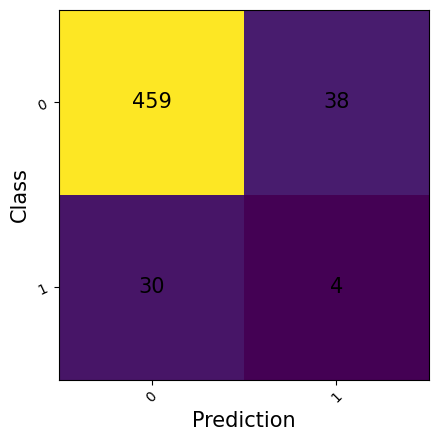

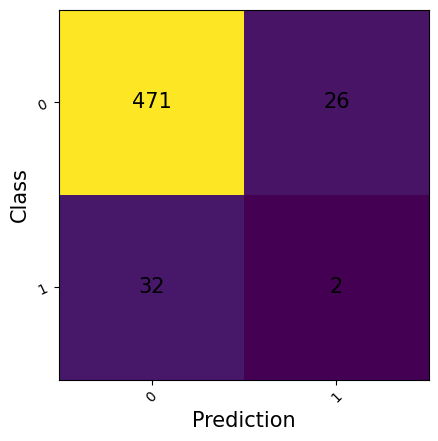

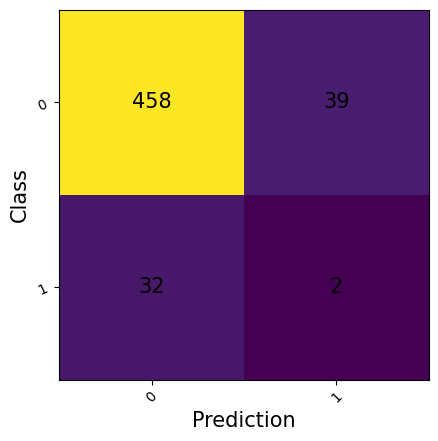

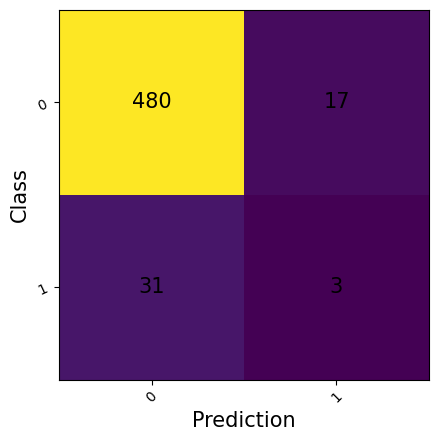

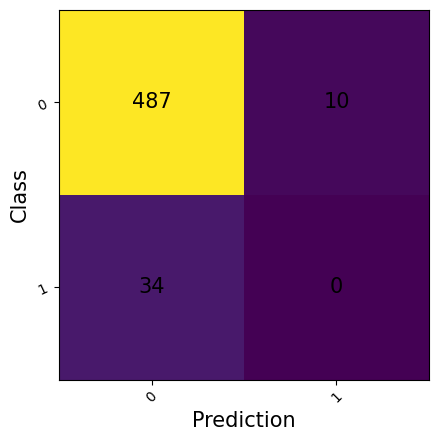

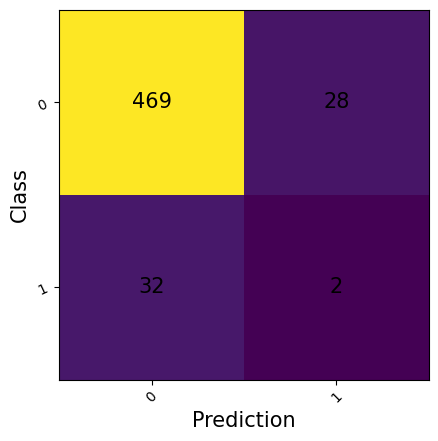

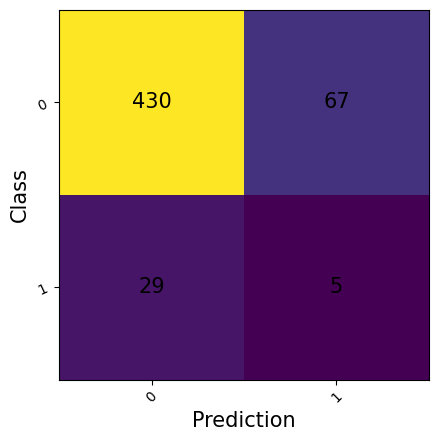

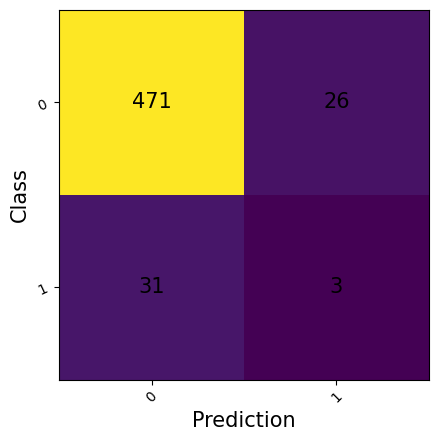

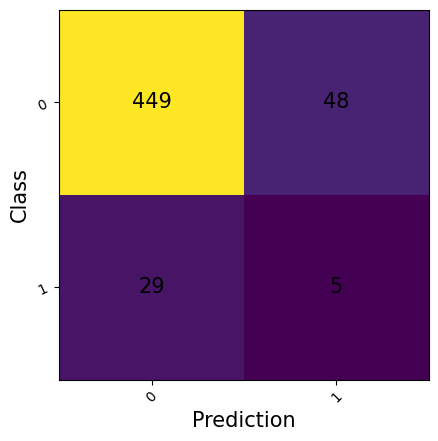

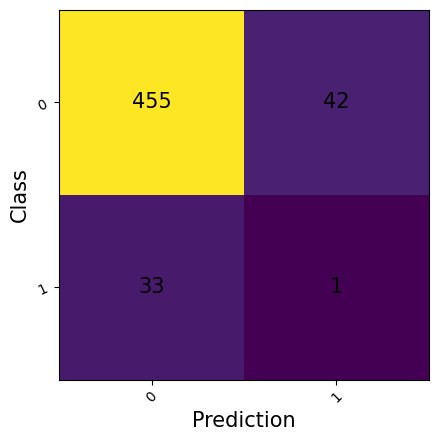

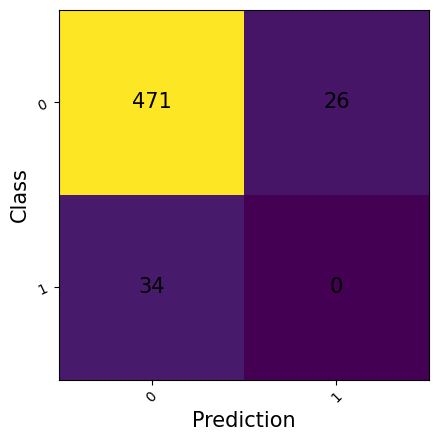

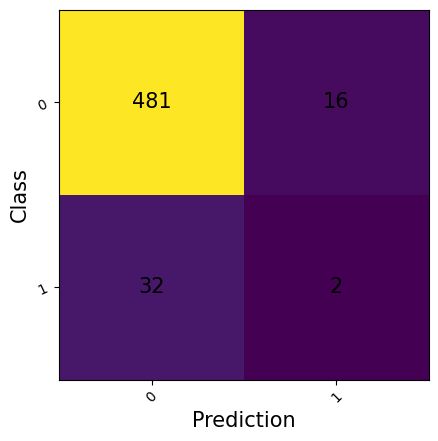

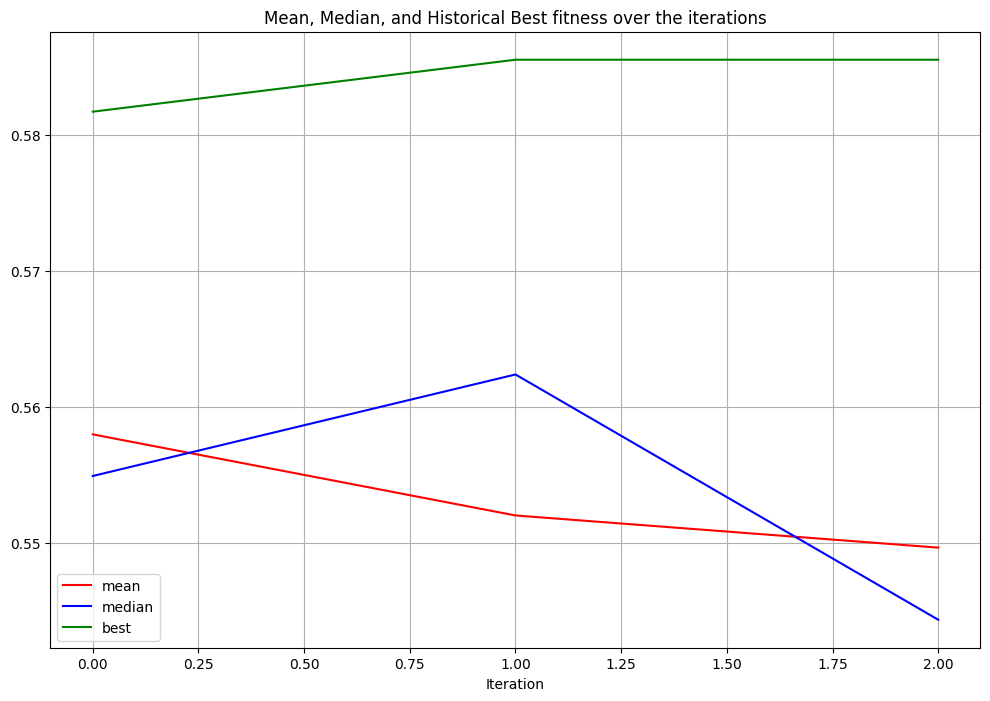

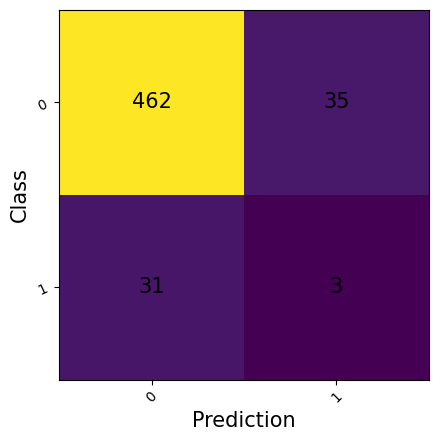

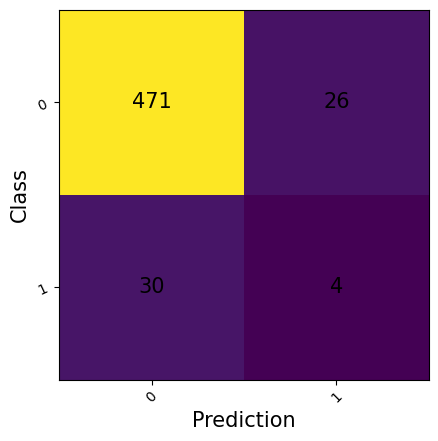

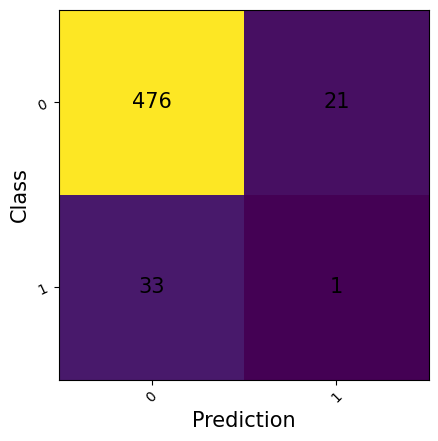

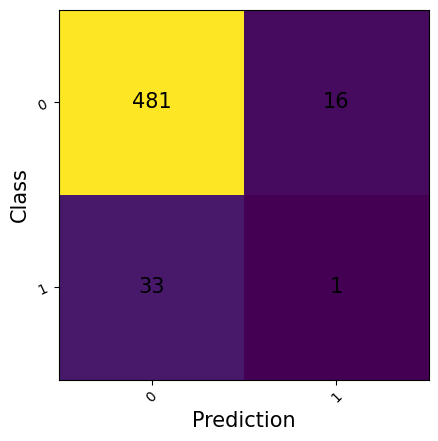

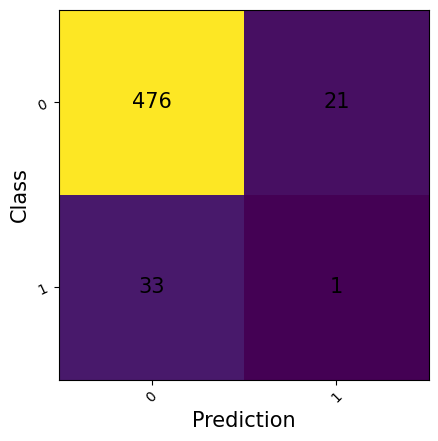

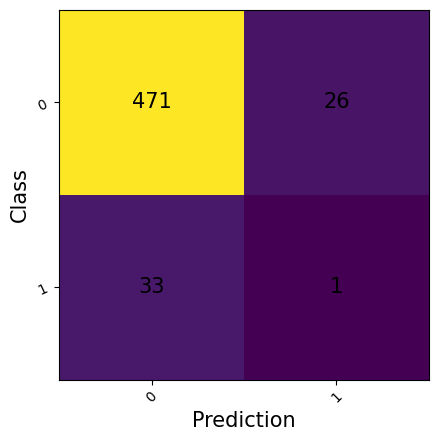

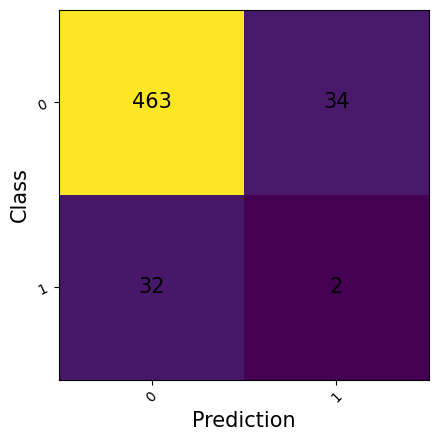

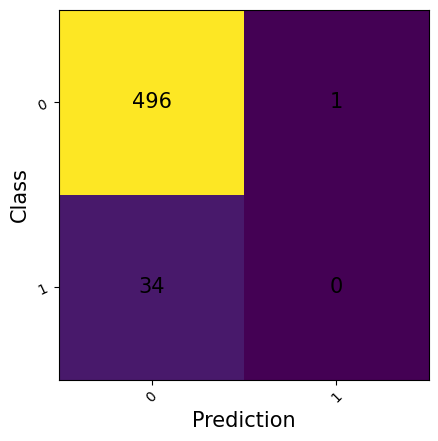

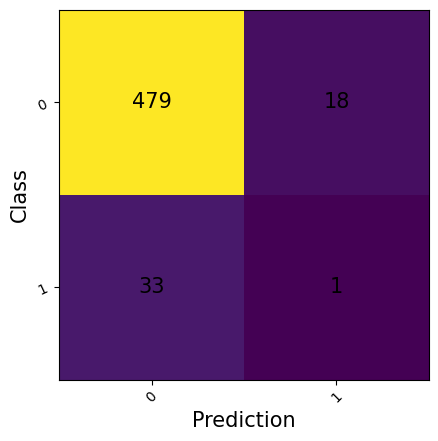

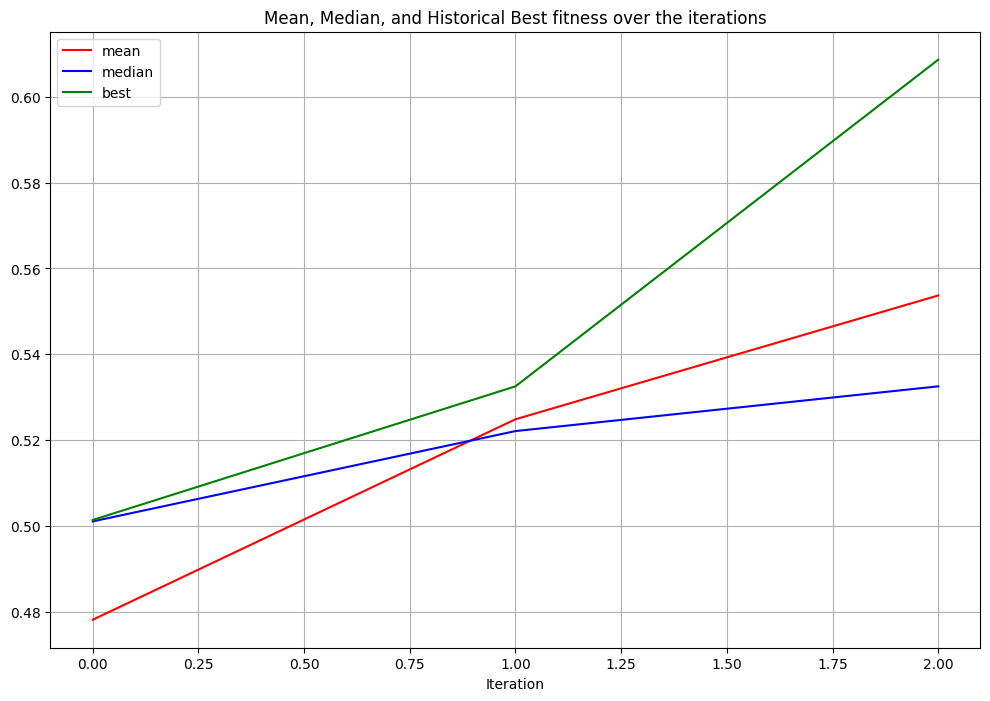

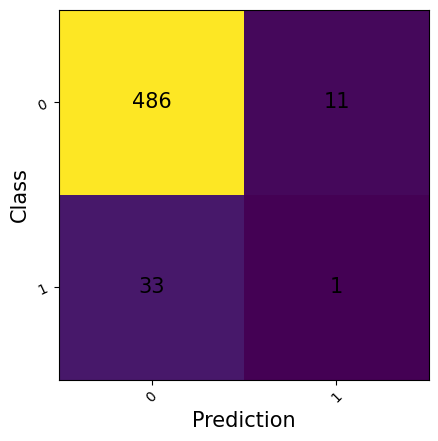

In [1]:
%run main.py